# Regresion Lineal y Logistica

## Regresion Lineal

En este ejemplo intentaremos adivinar cuantos likes tiene un video de tiktok a partir de la cantidad de vistas.
Suponemos que la cantidad de likes es linealmente proporcional a la cantidad de vistas. Por lo tanto buscaremos cual es la funcion que dibuja una linea cuya suma de las distancias a los puntos de nuestra tabla de entrenamiento es la menor posible. 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# tiktok vistas y likes de distintos videos

views = [234_000, 8_000, 217_000, 25_000, 62_000, 107_000, 
         140_000, 191_000, 189_000, 496_000, 221_000, 238_000]
likes = [ 39_000,   362,  31_000,  1_500,  4_000,   5_000,   
           6_000,  15_000,  11_000,  30_000,  30_000,  31_000]

In [3]:
df = pd.DataFrame({"Views":views,"Likes":likes})

In [4]:
df.head()

,Views,Likes
0,234000,39000
1,8000,362
2,217000,31000
3,25000,1500
4,62000,4000


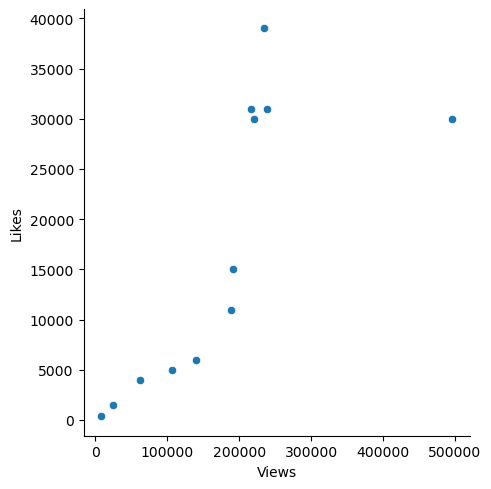

In [5]:
sns.relplot(x="Views",y="Likes", data=df);

### IA: adivinar y luego minimzar el error repetidamente

Otra forma de obtener dicha linea es a traves del algoritmo de gradiente descendiente. Este algorimo es muy importante en inteligencia artificial ya que nos permite encontrar un minimo de forma iterativa.

#### Generamos lineas al azar

Empezamos generando lineas al azar para ver que tan buenas predictoras son. Para ello calculamos la suma de las distancias de los puntos de la tabla de entrenamiento a las distintas rectas.

In [6]:
#inicializo con valores aleatorios
b = 0.0
w = 0.1
#hago mi prediccion
def prediccion(x, w, b): 
    return w * x + b
#mi suma de los errores al cuadrado sera
def costo(x, w, b, y): 
    return np.sum((y - prediccion(x,w,b))**2)

Solo elegiremos la pendiente w al azar, la ordenada al origen b la dejaremos fija en cero para que el ejemplo sea mas simple:

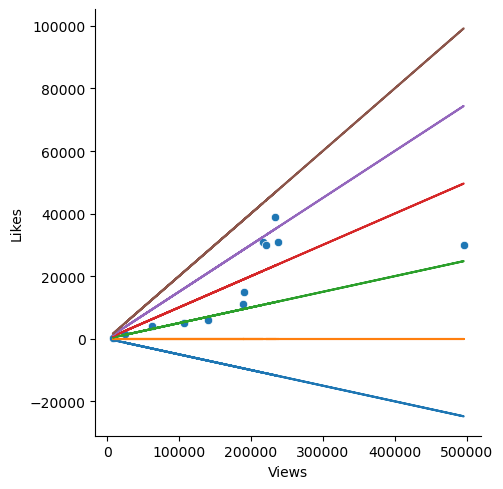

In [7]:
sns.relplot(x="Views",y="Likes", data=df)
pendientes = [-0.05,0.0,0.05,0.1,0.15,0.2]
costos = []
for w in pendientes:
    costos.append(costo(df["Views"], w, b, df["Likes"]))
    plt.plot(df["Views"], prediccion(df["Views"], w, b), '-');

#### Calculamos los errores de cada linea que creamos

Elegido un w al azar podemos calcular su costo, es decir, la suma de diferencias al cuadrado de los puntos de la tabla de entrenamiento a la linea dada por w. 

In [8]:
#tabla de la suma de errores para cada linea
df_costos = pd.DataFrame({"w":pendientes,"costo":costos})
df_costos

,w,costo
0,-0.05,1.220605e+10
1,0.00,5.668381e+09
2,0.05,1.936366e+09
3,0.10,1.010002e+09
4,0.15,2.889287e+09
5,0.20,7.574223e+09


Esta tabla nos da el costo de cada linea dependiendo de la pendiente w elegida. Si extendemos esta tabla para todos los w obtenemos la llamada funcion de costo:

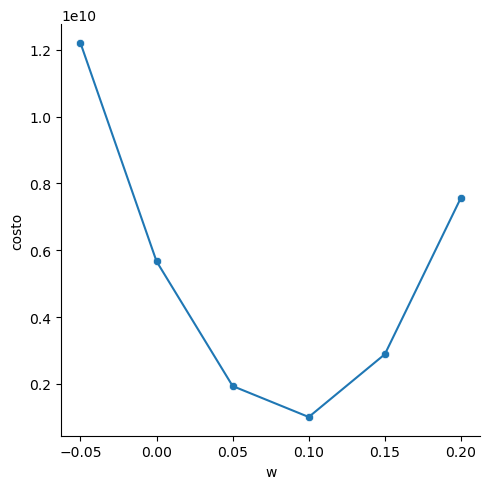

In [9]:
sns.relplot(x="w",y="costo", data=df_costos);
plt.plot(pendientes, costos, '-');

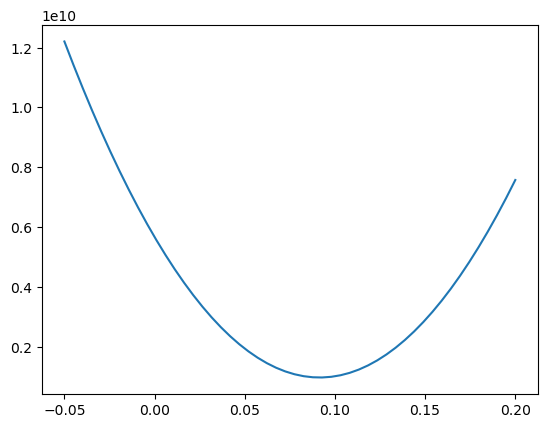

In [10]:
from scipy.interpolate import make_interp_spline, BSpline
xnew = np.linspace(np.min(pendientes), np.max(pendientes), 50) 
spl = make_interp_spline(pendientes, costos, k=3)
plt.plot(xnew, spl(xnew));

#### El truco matematico del gradiente descendiente

Teniendo la funcion de costo podemos utilizar la pendiente (derivada) de dicha funcion de costo para saber en que direccion tenemos que buscar para encontrar el minimo:

In [11]:
#utilizamos la libreria sympy para obtener la derivada de la funcion de costo
import sympy as sy

In [12]:
x,y,w,b = sy.symbols('x y w b')
costFunf = (y-(w*x+b))**2
costFunf

(-b - w*x + y)**2

Derivada parcial de la funcion de costo respecto de w:

In [13]:
sy.diff(costFunf,w)

-2*x*(-b - w*x + y)

Derivada parcial de la funcion de costo respecto de b:

In [14]:
sy.diff(costFunf,b)

2*b + 2*w*x - 2*y

In [15]:
del x,y,w,b

Las siguientes funciones nos indican entonces en que direccion tenemos que ir para encontrar el minimo:

In [16]:
def gradW(x,y,w,b):
    grad = -2*x*(-b-w*x+y)
    grad = np.sum(grad)
    return grad

In [17]:
def gradb(x,y,w,b):
    grad = 2*b+2*w*x-2*y
    grad = np.sum(grad)
    return grad

#### El algortimo del gradiente descendiente

A continuacion empiezo con un w al azar y luego lo voy modificando de a poco para ir en direccion hacia el minimo costo. Tengo que tener cuidado de ir modificando de a poco porque si el paso que doy es demasiado grande el algoritmo puede diverger (no encontrara el minimo) o puede tardar mucho si el paso es muy pequeño. A el tamaño de cada paso hacia el minimo se lo conoce como Learning Rate (LR)

In [18]:
x = np.array(df["Views"])
y = np.array(df["Likes"])
w = 0.2
b = 0.0
ws, cs = [], []
for i in range(20):
    ws.append(w)
    cost = costo(x, w, b, y)
    cs.append(cost)
    grad = gradW(x, y, w, b)
    print(f"w:{w:0.3f} cost:{int(cost):10}")
    w = w - 0.0000000000003 * grad #LR adecuado. El algoritmo encuentra el minimo
    #w = w - 0.0000000000018 * grad #LR demasiado grande. El algoritmo diverge
    #w = w - 0.00000000000001 * grad #LR demasiado chico. El algoritmo tarda mucho

w:0.200 cost:7574222644
w:0.163 cost:3875577341
w:0.139 cost:2248187923
w:0.123 cost:1532142966
w:0.113 cost:1217085994
w:0.105 cost:1078462163
w:0.101 cost:1017468221
w:0.098 cost: 990631126
w:0.096 cost: 978822910
w:0.094 cost: 973627341
w:0.093 cost: 971341311
w:0.093 cost: 970335467
w:0.092 cost: 969892899
w:0.092 cost: 969698172
w:0.092 cost: 969612492
w:0.092 cost: 969574793
w:0.092 cost: 969558206
w:0.092 cost: 969550908
w:0.092 cost: 969547697
w:0.092 cost: 969546284


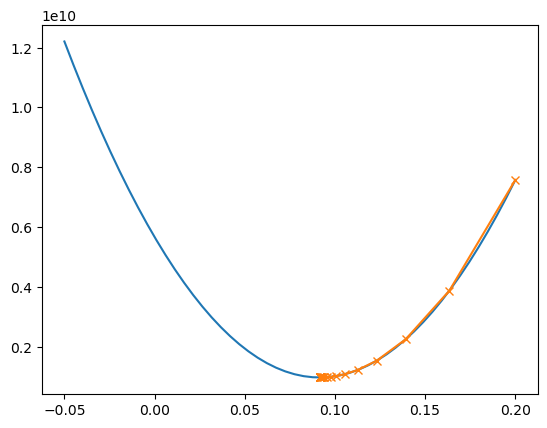

In [19]:
from scipy.interpolate import make_interp_spline, BSpline
xnew = np.linspace(np.min(pendientes), np.max(pendientes), 50) 
spl = make_interp_spline(pendientes, costos, k=3)
plt.plot(xnew, spl(xnew));
plt.plot(ws, cs, 'x-');

#### Extendemos el algoritmo para mas dimensiones

Aqui extendemos el algoritmo para encontrar tambien la ordenada al origen. De la misma forma podemos extenderlo para mas dimensiones.

In [20]:
x = np.array(df["Views"])
y = np.array(df["Likes"])
w = 0.2
b = 0.0
for epoch in range(60):
    cost = costo(x, w, b, y)
    tmp_gradW = gradW(x, y, w, b)
    tmp_gradb = gradb(x, y, w, b)
    if epoch%5 == 0: print(f"w:{w:0.4f} b:{int(b):4} cost:{int(cost):10}")
    w = w - 0.000000000001 * tmp_gradW
    b = b - 0.03 * tmp_gradb

w:0.2000 b:   0 cost:7574222644
w:0.0936 b:-3824 cost:1182882644
w:0.0932 b: 485 cost: 968780228
w:0.0863 b:1423 cost: 951531737
w:0.0844 b:1958 cost: 948898121
w:0.0834 b:2165 cost: 948432137
w:0.0830 b:2256 cost: 948347957
w:0.0828 b:2294 cost: 948332709
w:0.0828 b:2311 cost: 948329947
w:0.0827 b:2318 cost: 948329446
w:0.0827 b:2321 cost: 948329355
w:0.0827 b:2322 cost: 948329339


## Regresion Logistica (para clasificacion)

Utilizando la tecnica del gradiente descendiente en este ejemplo intentaremos adivinar si a una persona que le damos un prestamo nos devolvera el dinero. En este caso nuestros valores a predecir no son numeros sino una variable categorica que puede tener los valores SI o NO.

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
df = pd.DataFrame({"Salario":[1500,600,1800,700,1400,3100,2900,4200,5100,4500],
                  "Ahorro": [11000,5700,1500,7100,4900,11000,13000,14000,18000,16000],
                  "Devolvio":[0,0,0,0,0,1,1,1,1,1]})

In [23]:
df.head()

,Salario,Ahorro,Devolvio
0,1500,11000,0
1,600,5700,0
2,1800,1500,0
3,700,7100,0
4,1400,4900,0


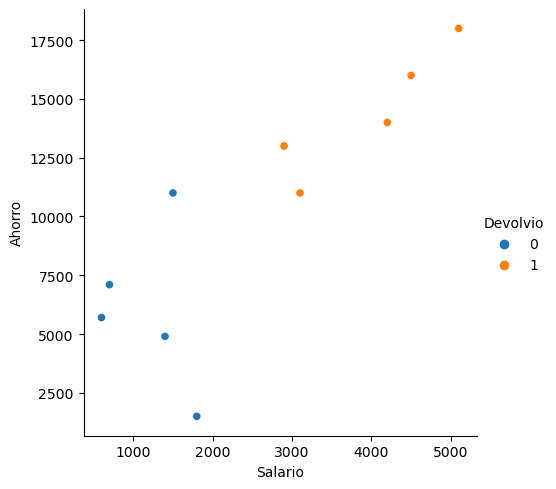

In [24]:
sns.relplot(x="Salario", y="Ahorro", hue="Devolvio", data=df);

Debido a que la variable a predecir es categorica, la funcion que buscaremos no sera una linea recta si no una funcion sigmoidea. En donde todos los valores que son mayores a cierto umbral seran iguales a SI y los menores a ese umbral seran iguales a NO:

In [25]:
sigmoid = lambda x: 1 / (1 + np.exp(-x))

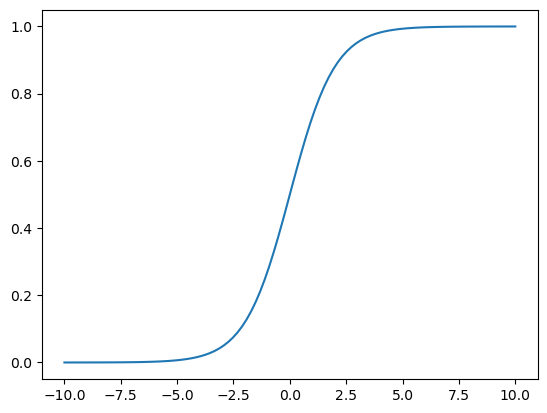

In [26]:
plt.plot(np.linspace(-10,10,100), sigmoid(np.linspace(-10,10,100)), '-');

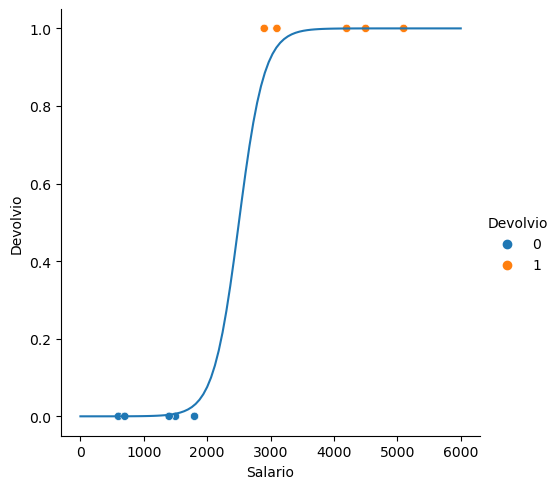

In [27]:
sns.relplot(x="Salario", y="Devolvio", hue="Devolvio", data=df);
plt.plot(np.linspace(0,6000,100), sigmoid(5*(np.linspace(0,6000,100)/1000-2.5)), '-');

Tambien cambiara la funcion para medir que tan bien mi funcion sigmoidea se ajusta a la tabla de entrenamiento. Por lo tanto no usaremos la funcion de suma de diferencias de cuadrados sino que utilizaremos la funcion llamada entropia cruzada:

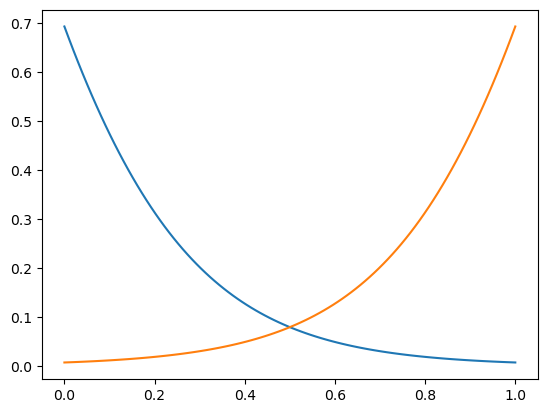

In [28]:
costoy1 = lambda x: -np.log(sigmoid(x))
plt.plot(np.linspace(0,1,100), costoy1(np.linspace(0,5,100)), '-');
costoy0 = lambda x: -np.log(1-sigmoid(x))
plt.plot(np.linspace(0,1,100), costoy0(np.linspace(-5,0,100)), '-');

Con estas dos modificaciones podemos volver a utilizar el algoritmo de gradiente descendiente para encontrar la funcion que mejor se adapta a mi tabla de entrenamiento.

### Con Scikit Learn

In [29]:
from sklearn.linear_model import LogisticRegression
X = df.loc[:,["Salario","Ahorro"]].to_numpy()
y = df.loc[:,"Devolvio"].to_numpy()
clf = LogisticRegression(random_state=0).fit(X, y)

In [30]:
clf.predict([[3_000,15_000]])

array([1])

In [31]:
clf.predict([[900,8_000]])

array([0])

# Fin: [Volver al contenido del curso](https://www.freecodingtour.com/cursos/espanol/datascience/datascience.html)